###  Model with multiple layer

In [3]:
import pandas as pd
import numpy as np
import os
import time

In [4]:
train   = pd.read_csv("./default.csv", sep=";",low_memory=False)

In [5]:
train.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
train = train.drop("Unnamed: 0",axis = 1)

In [7]:
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import random

X = train[train.columns[~train.columns.isin(['Y'])]]
y = train[['Y']]

X_scaled = StandardScaler().fit(X).transform(X)

X_scaled = pd.DataFrame(X_scaled) 

X_scaled.columns = X.columns

random.seed(1)
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, stratify = y)

Using TensorFlow backend.


In [9]:
y_train = np.asarray(y_train).astype('float32')
y_valid = np.asarray(y_valid).astype('float32')

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

checkpoint = ModelCheckpoint(filepath = "weights.hdf5", verbose=1, save_best_only=True)

def get_model(inp,activation = "relu"):
    
    model = Sequential()
    model.add(Dense(64, activation=activation, input_dim = inp))
    model.add(Dropout(.5))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(.5))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"]) #mse #metrics=[tf.keras.metrics.AUC()]
    return model

In [29]:
model = get_model(23)

In [30]:
 history = model.fit(X_train, y_train, batch_size = 64, epochs = 60, validation_data=[X_valid, y_valid], callbacks = [checkpoint])

Train on 24000 samples, validate on 6000 samples
Epoch 1/60
24000/24000 [==============================] - 1s - loss: 0.5183 - acc: 0.7870 - val_loss: 0.4722 - val_acc: 0.8132
Epoch 2/60
24000/24000 [==============================] - 1s - loss: 0.4732 - acc: 0.8040 - val_loss: 0.4537 - val_acc: 0.8077
Epoch 3/60
24000/24000 [==============================] - 1s - loss: 0.4594 - acc: 0.8079 - val_loss: 0.4478 - val_acc: 0.8143
Epoch 4/60
24000/24000 [==============================] - 1s - loss: 0.4534 - acc: 0.8109 - val_loss: 0.4515 - val_acc: 0.7998
Epoch 5/60
24000/24000 [==============================] - 1s - loss: 0.4512 - acc: 0.8125 - val_loss: 0.4475 - val_acc: 0.8068
Epoch 6/60
24000/24000 [==============================] - 1s - loss: 0.4491 - acc: 0.8118 - val_loss: 0.4456 - val_acc: 0.8167
Epoch 7/60
24000/24000 [==============================] - 1s - loss: 0.4461 - acc: 0.8138 - val_loss: 0.4432 - val_acc: 0.8178
Epoch 8/60
24000/24000 [==============================] - 1s -

24000/24000 [==============================] - 1s - loss: 0.4278 - acc: 0.8216 - val_loss: 0.4344 - val_acc: 0.8167
Epoch 60/60
24000/24000 [==============================] - 1s - loss: 0.4284 - acc: 0.8211 - val_loss: 0.4340 - val_acc: 0.8173


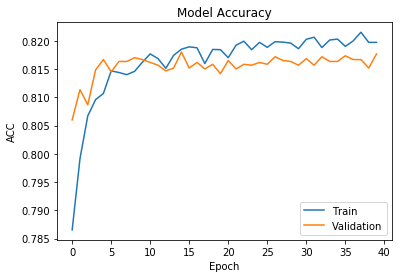

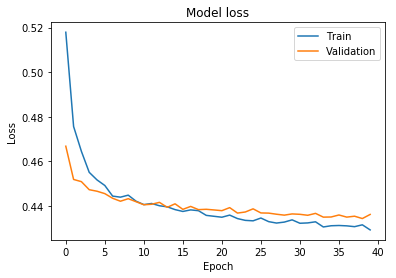

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('ACC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, f1_score 
y_pred = model.predict(X_valid)
probabilities = pd.DataFrame(model.predict_proba(X_valid))
auc           = roc_auc_score(np.array(y_valid),np.array(probabilities))

2720/6000 [============>.................] - ETA: 0s

In [22]:
auc

0.77140158530679626

###  Model with single layer

In [ ]:
def get_model(inp,activation = "relu"):
    
    model = Sequential()
    model.add(Dense(30, activation=activation, input_dim = inp))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"]) #mse #metrics=[tf.keras.metrics.AUC()]
    return model

In [23]:
model = get_model(23)

In [24]:
 history = model.fit(X_train, y_train, batch_size = 64, epochs = 40, validation_data=[X_valid, y_valid], callbacks = [checkpoint])

Train on 24000 samples, validate on 6000 samples
Epoch 1/40
24000/24000 [==============================] - 1s - loss: 0.5181 - acc: 0.7859 - val_loss: 0.4619 - val_acc: 0.8097
Epoch 2/40
24000/24000 [==============================] - 1s - loss: 0.4732 - acc: 0.8044 - val_loss: 0.4515 - val_acc: 0.8143
Epoch 3/40
24000/24000 [==============================] - 1s - loss: 0.4606 - acc: 0.8078 - val_loss: 0.4485 - val_acc: 0.8133
Epoch 4/40
24000/24000 [==============================] - 1s - loss: 0.4525 - acc: 0.8116 - val_loss: 0.4467 - val_acc: 0.8152
Epoch 5/40
24000/24000 [==============================] - 1s - loss: 0.4502 - acc: 0.8117 - val_loss: 0.4447 - val_acc: 0.8177
Epoch 6/40
24000/24000 [==============================] - 1s - loss: 0.4489 - acc: 0.8132 - val_loss: 0.4457 - val_acc: 0.8143
Epoch 7/40
24000/24000 [==============================] - 1s - loss: 0.4460 - acc: 0.8133 - val_loss: 0.4442 - val_acc: 0.8167
Epoch 8/40
24000/24000 [==============================] - 1s -

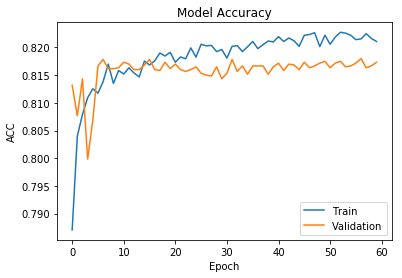

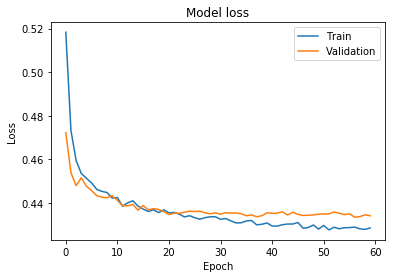

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('ACC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, f1_score 
y_pred = model.predict(X_valid)
probabilities = pd.DataFrame(model.predict_proba(X_valid))
auc           = roc_auc_score(np.array(y_valid),np.array(probabilities))

4128/6000 [===================>..........] - ETA: 0s

In [33]:
auc

0.77305815398662581

### By comparing with other models, we found the neural network outperform than them in terms of AUC.